# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [14]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import numpy as np

In [15]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MBOX_key")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [16]:
# Import the necessary CSVs to Pandas DataFrames

#importing the housing price and rent data per year and neighborhood 
sfo_data = pd.read_csv("Data/sfo_neighborhoods_census_data.csv", index_col="year")

# Load neighborhoods coordinates data
neighborhood_corr = pd.read_csv("Data/neighborhoods_coordinates.csv" , index_col='Neighborhood')


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [25]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # Calculate the mean number of housing units per year (hint: use groupby) 
    sfo_data_by_year = sfo_data.groupby(by="year").mean().drop(columns = ["sale_price_sqr_foot","gross_rent"])
    # converting to integers 
    sfo_data_by_year['housing_units'] = sfo_data_by_year['housing_units'].astype("int64")
    #calculate the scales using the standard deviation from the min and max     
    ymin = min(sfo_data_by_year.housing_units)- np.std(sfo_data_by_year.housing_units)
    ymax = max(sfo_data_by_year.housing_units) + np.std(sfo_data_by_year.housing_units)
    
    return sfo_data_by_year.plot( 
            kind = "bar",
            y = "housing_units",
            title="Housing Units in San Fransisco from 2010 to 2016",
            xlabel = "Year",
            ylabel = "Housing Units" ,
            ylim = [ ymin , ymax ],
            legend = False
            )
  

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # Calculate the average sale price per square foot and average gross rent
    sfo_avg_sale_rent = round(sfo_data.groupby(by="year").mean().drop(columns = "housing_units"),2)

    # converting to integers 
    sfo_avg_sale_rent['gross_rent']=sfo_avg_sale_rent['gross_rent'].astype("int64")

    # Line chart for average montly rent
    return sfo_avg_sale_rent.plot(
            kind="line",
            title="Average Gross Rent by Year",
            color= "red",
            xlabel= "Year",
            y= "gross_rent",
            ylabel= "Average Gross Rent" ,
            legend = False
            )
    
def average_sales_price():
    """Average Sales Price Per Year."""
    
    # Calculate the average sale price per square foot and average gross rent
    sfo_avg_sale_rent = round(sfo_data.groupby(by="year").mean().drop(columns = "housing_units"),2)

    # converting to integers 
    sfo_avg_sale_rent['gross_rent']=sfo_avg_sale_rent['gross_rent'].astype("int64")
    
    # Line chart for average sale price per square foot
     
    return sfo_avg_sale_rent.plot(
            kind="line",
            title="Average Price per SqFt by Year",
            color = "purple",
            xlabel= "Year",
            y= "sale_price_sqr_foot",
            ylabel= "Price per SqFt",
            legend = False
            )


def average_price_by_neighborhood(Neigborhood):
    """Average Prices by Neighborhood."""
    
    # Group by year and neighborhood and then create a new dataframe of the mean values
    sfo_by_year_neighborhood = round(sfo_data.groupby(by = ['year', 'neighborhood']).mean().reset_index(),2)

    # converting to integers 
    sfo_by_year_neighborhood[['housing_units','gross_rent']] = sfo_by_year_neighborhood[['housing_units','gross_rent']].astype("int64") 

    # create a temp list per chosen niegborhood
    temp_df = sfo_by_year_neighborhood[sfo_by_year_neighborhood["neighborhood"] == Neigborhood]
    
    #Create a hvplot and store in plot to be returned  
    plot = temp_df.hvplot.line(
        x="year",
        xlabel = "Year",
        y= "sale_price_sqr_foot",
        ylabel = "Avg. Sale Price per Square Foot", 
        title=f"Neighborhood : {Neigborhood} - Average Sale Price per SqFt Plot",
        xformatter = '%.0f',
        height = 350) 
    return interact(avg_price_sqft_plot,Neigborhood = sfo_by_year_neighborhood["neighborhood"].unique())



def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    # YOUR CODE HERE!


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # YOUR CODE HERE!

    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!



def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!



def neighborhood_map():
    """Neighborhood Map."""

    # YOUR CODE HERE!


def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [ ]:
# Create a Title for the Dashboard
# YOUR CODE HERE!


# Create a tab layout for the dashboard
# YOUR CODE HERE!


# Create the dashboard
# YOUR CODE HERE!

## Serve the Panel Dashboard

In [ ]:
# Serve the# dashboard
# YOUR CODE HERE!

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

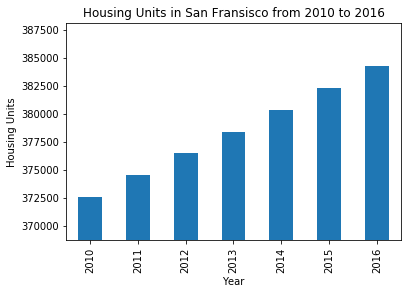

In [17]:
housing_units_per_year()

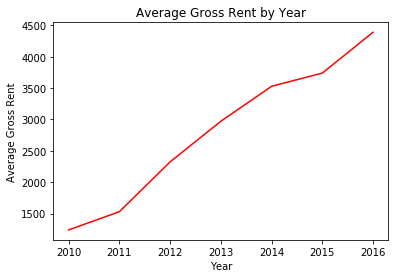

In [21]:
average_gross_rent()

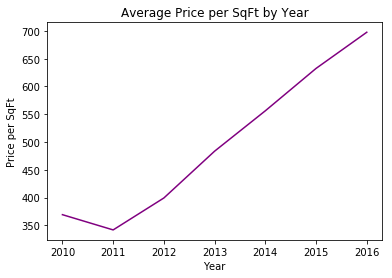

In [22]:
average_sales_price()

In [26]:
average_price_by_neighborhood()

TypeError: average_price_by_neighborhood() missing 1 required positional argument: 'Neigborhood'

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()